<a href="https://colab.research.google.com/github/jader-lima/TimeSeriesLSTM/blob/master/Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/jader-lima/TimeSeriesLSTM/master/passageiros.csv'
passageiros = pd.read_csv(url, error_bad_lines=False)


In [3]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


Cada mes é 0.083333

In [4]:
0.083333

0.083333

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


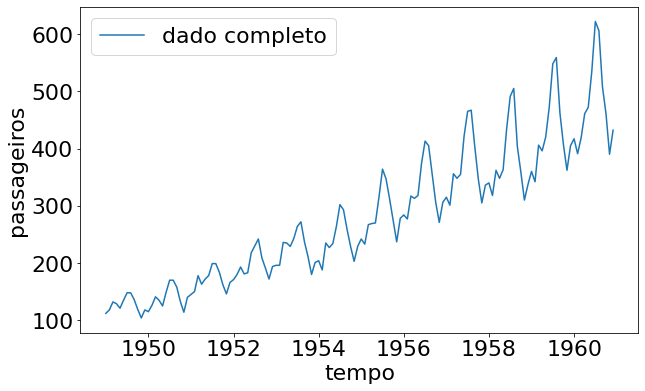

In [5]:
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

sns.lineplot(x='tempo', y = 'passageiros',data=passageiros, label='dado completo')

In [8]:
from sklearn.preprocessing import StandardScaler


In [10]:
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
dados_escalado = sc.transform(passageiros)

In [12]:
x = dados_escalado[:,0]
y = dados_escalado[:,1]

Text(0.5, 0, 'Data')

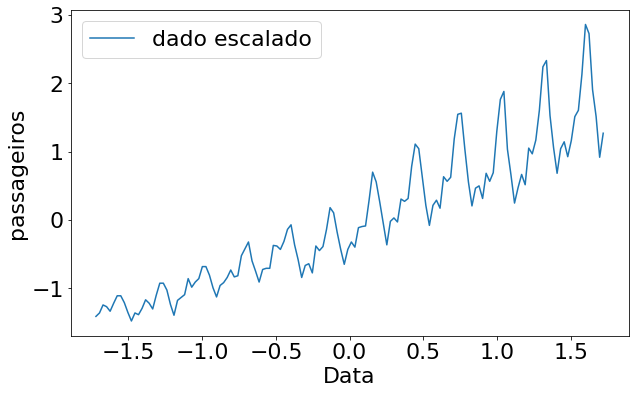

In [14]:
import matplotlib.pyplot as plt
sns.lineplot(x=x, y = y, label='dado escalado')
plt.ylabel('passageiros')
plt.xlabel('Data')

In [15]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [17]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [18]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'Data')

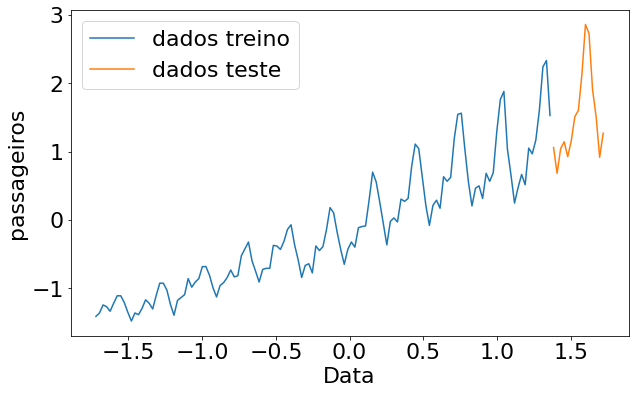

In [19]:
import matplotlib.pyplot as plt
sns.lineplot(x=xtreino, y = ytreino , label='dados treino')
sns.lineplot(x=xteste, y = yteste , label='dados teste')
plt.ylabel('passageiros')
plt.xlabel('Data')